In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import seaborn as srn
from scipy import stats

plt.style.use('ggplot')

In [208]:
# #leitura variáveis de ambiente
# load_dotenv()
# ds_path = os.getenv("TV_SHOW_PATH")

df = pd.read_csv("vgsales.csv")

In [209]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [210]:
df['Year'] = df['Year'].astype('Int64')

In [211]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Lançamentos por ano

In [212]:
year = df['Year'].value_counts()

Text(0.5, 1.0, 'Lançamento de jogos ao longo dos anos')

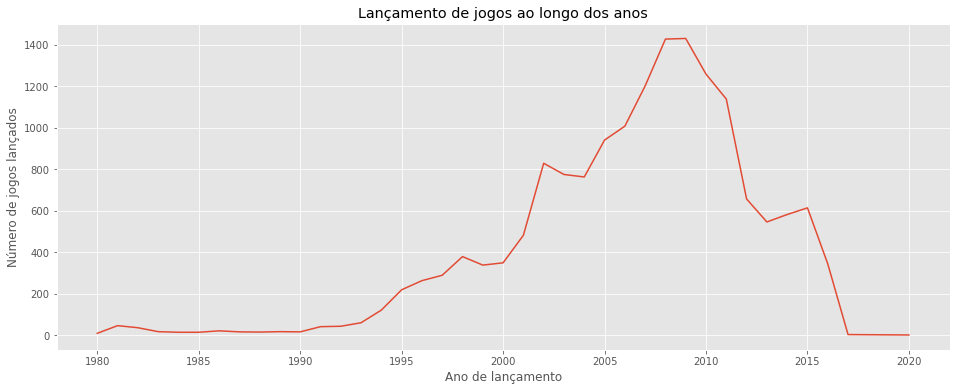

In [213]:
plt.figure(figsize=(16,6))
srn.lineplot(x=year.index, y=year)
plt.xlabel("Ano de lançamento")
plt.ylabel("Número de jogos lançados")
plt.title("Lançamento de jogos ao longo dos anos")

# Gêneros

In [214]:
genres = df['Genre'].value_counts()

In [215]:
genres

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

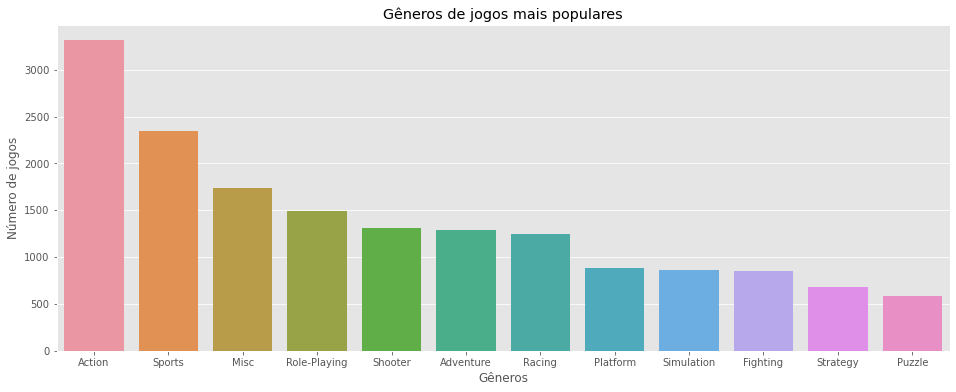

In [216]:
plt.figure(figsize=(16,6))
srn.barplot(x=genres.index, y=genres.values)
plt.xlabel("Gêneros")
plt.ylabel("Número de jogos")
plt.title("Gêneros de jogos mais populares")
plt.show()

# Vendas por gênero

In [217]:
genre_sales = df.groupby('Genre').agg('sum').drop(columns=['Rank', 'Year'])
genre_sales = genre_sales.sort_values('Global_Sales', ascending=False)
genre_sales.drop(columns=['Global_Sales'], inplace=True)

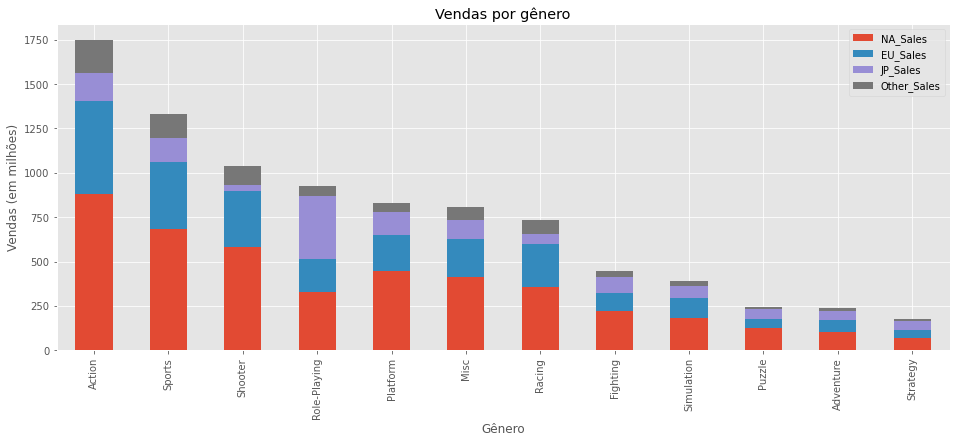

In [218]:
genre_sales.plot(kind='bar', stacked=True, figsize=(16,6))
plt.xlabel("Gênero")
plt.ylabel("Vendas (em milhões)")
plt.title("Vendas por gênero")
plt.show()

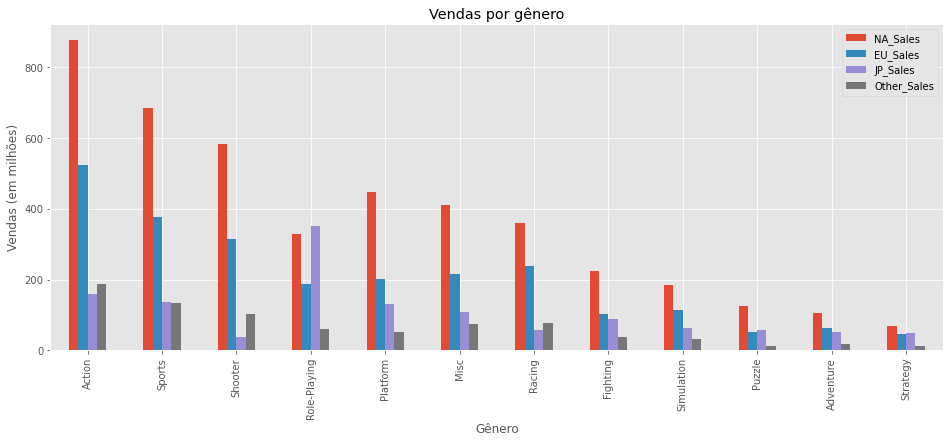

In [219]:
genre_sales.plot(kind='bar', figsize=(16,6))
plt.xlabel("Gênero")
plt.ylabel("Vendas (em milhões)")
plt.title("Vendas por gênero")
plt.show()

# Ano x Gênero

In [220]:
year_genre = pd.pivot_table(df, values='Global_Sales', index=['Year'],columns=['Genre'], aggfunc=np.sum)

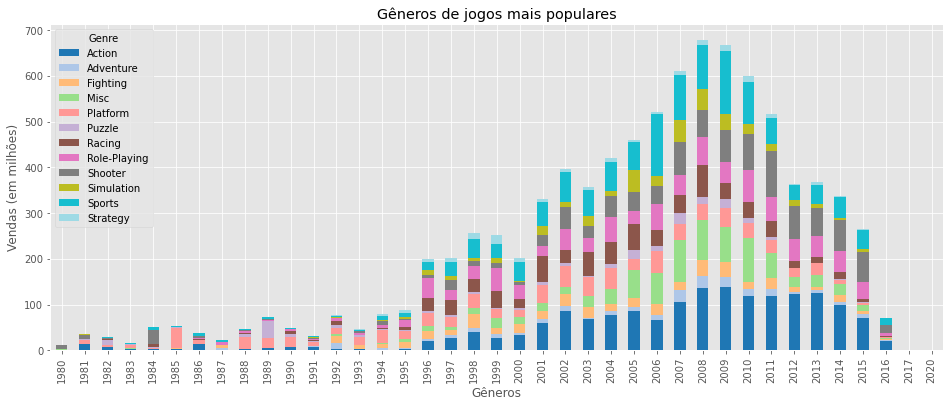

In [221]:
year_genre.plot(kind='bar', stacked=True, figsize=(16,6), cmap='tab20')
plt.xlabel("Gêneros")
plt.ylabel("Vendas (em milhões)")
plt.title("Gêneros de jogos mais populares")
plt.show()

# Ano x Plataforma

In [222]:
year_platform = pd.pivot_table(df, values='Global_Sales', index=['Year'],columns=['Platform'], aggfunc=np.sum)

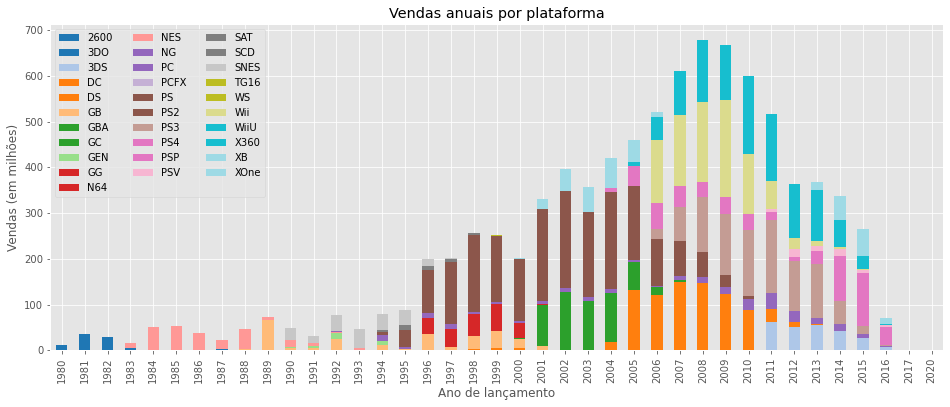

In [223]:
year_platform.plot(kind='bar', stacked=True, figsize=(16,6), cmap='tab20')
plt.xlabel("Ano de lançamento")
plt.ylabel("Vendas (em milhões)")
plt.title("Vendas anuais por plataforma")
plt.legend(loc="upper left", ncol=3)
plt.show()

### Somente top 10 Plataformas

In [224]:
top10plat = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
top10plat = top10plat.index[:10].to_list()

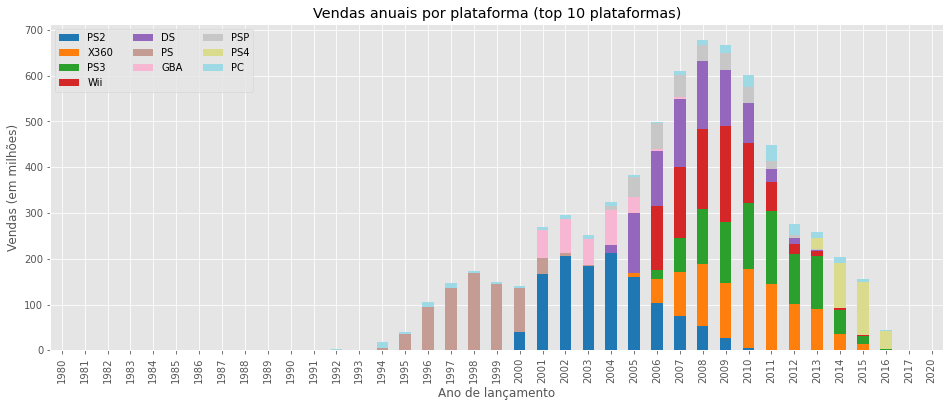

In [240]:
year_platform[top10plat].plot(kind='bar', stacked=True, figsize=(16,6), cmap='tab20')
plt.xlabel("Ano de lançamento")
plt.ylabel("Vendas (em milhões)")
plt.title("Vendas anuais por plataforma (top 10 plataformas)")
plt.legend(loc="upper left", ncol=3)
plt.show()

# Vendas por plataforma

In [226]:
genre_sales = df.groupby('Platform').agg('sum').drop(columns=['Rank', 'Year'])
genre_sales = genre_sales.sort_values('Global_Sales', ascending=True)
genre_sales.drop(columns=['Global_Sales'], inplace=True)

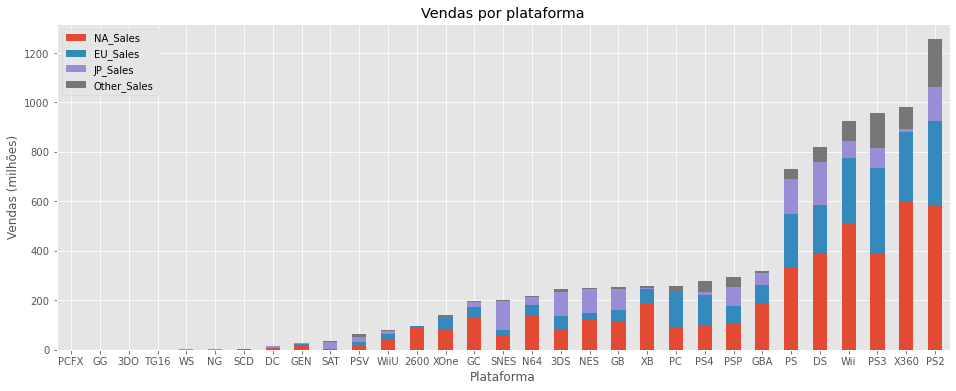

In [239]:
genre_sales.plot(kind='bar', stacked=True, figsize=(16,6))
plt.xticks(rotation=0)
plt.xlabel("Plataforma")
plt.ylabel("Vendas (milhões)")
plt.title("Vendas por plataforma")
plt.show()

# Publisher

In [228]:
publisher_sales = df.groupby('Publisher').agg('sum').drop(columns=['Rank', 'Year'])
publisher_sales = publisher_sales.sort_values('Global_Sales', ascending=True)
publisher_sales.drop(columns=['Global_Sales'], inplace=True)

In [229]:
top10pub = publisher_sales.sum(axis=1).sort_values(ascending=False).index[:10].to_list()

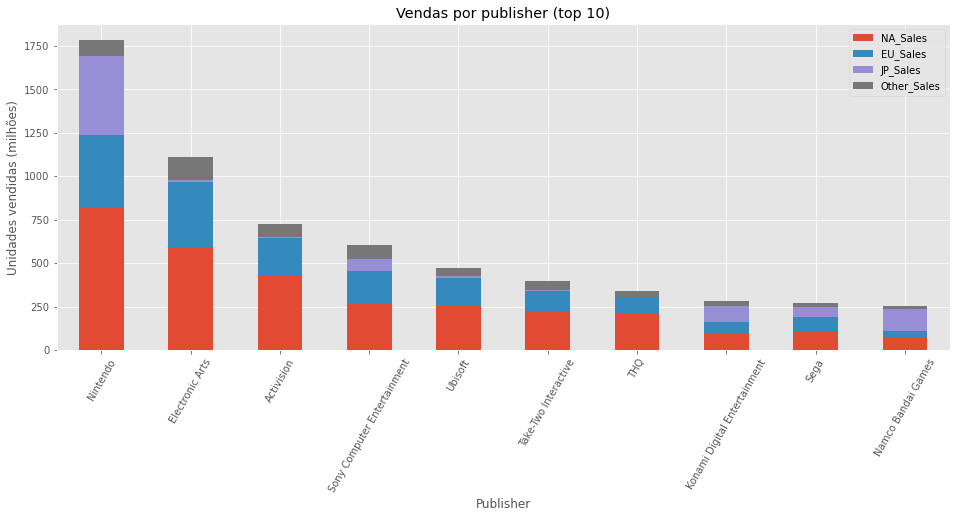

In [230]:
publisher_sales.loc[top10pub, :].plot(kind='bar', stacked=True, figsize=(16,6))
plt.xticks(rotation=60)
plt.xlabel("Publisher")
plt.ylabel("Unidades vendidas (milhões)")
plt.title("Vendas por publisher (top 10)")
plt.show()

In [258]:
#Função para normalizar pd.Series (localmente)

def min_max_norm(x):
    return (x - x.min())/(x.max() - x.min())

# Distribuições de vendas por gênero

In [293]:
all_genres = df['Genre'].drop_duplicates().to_list()[:12]
sales_per_genre = [df[df['Genre']==g]['Global_Sales'] for g in all_genres]

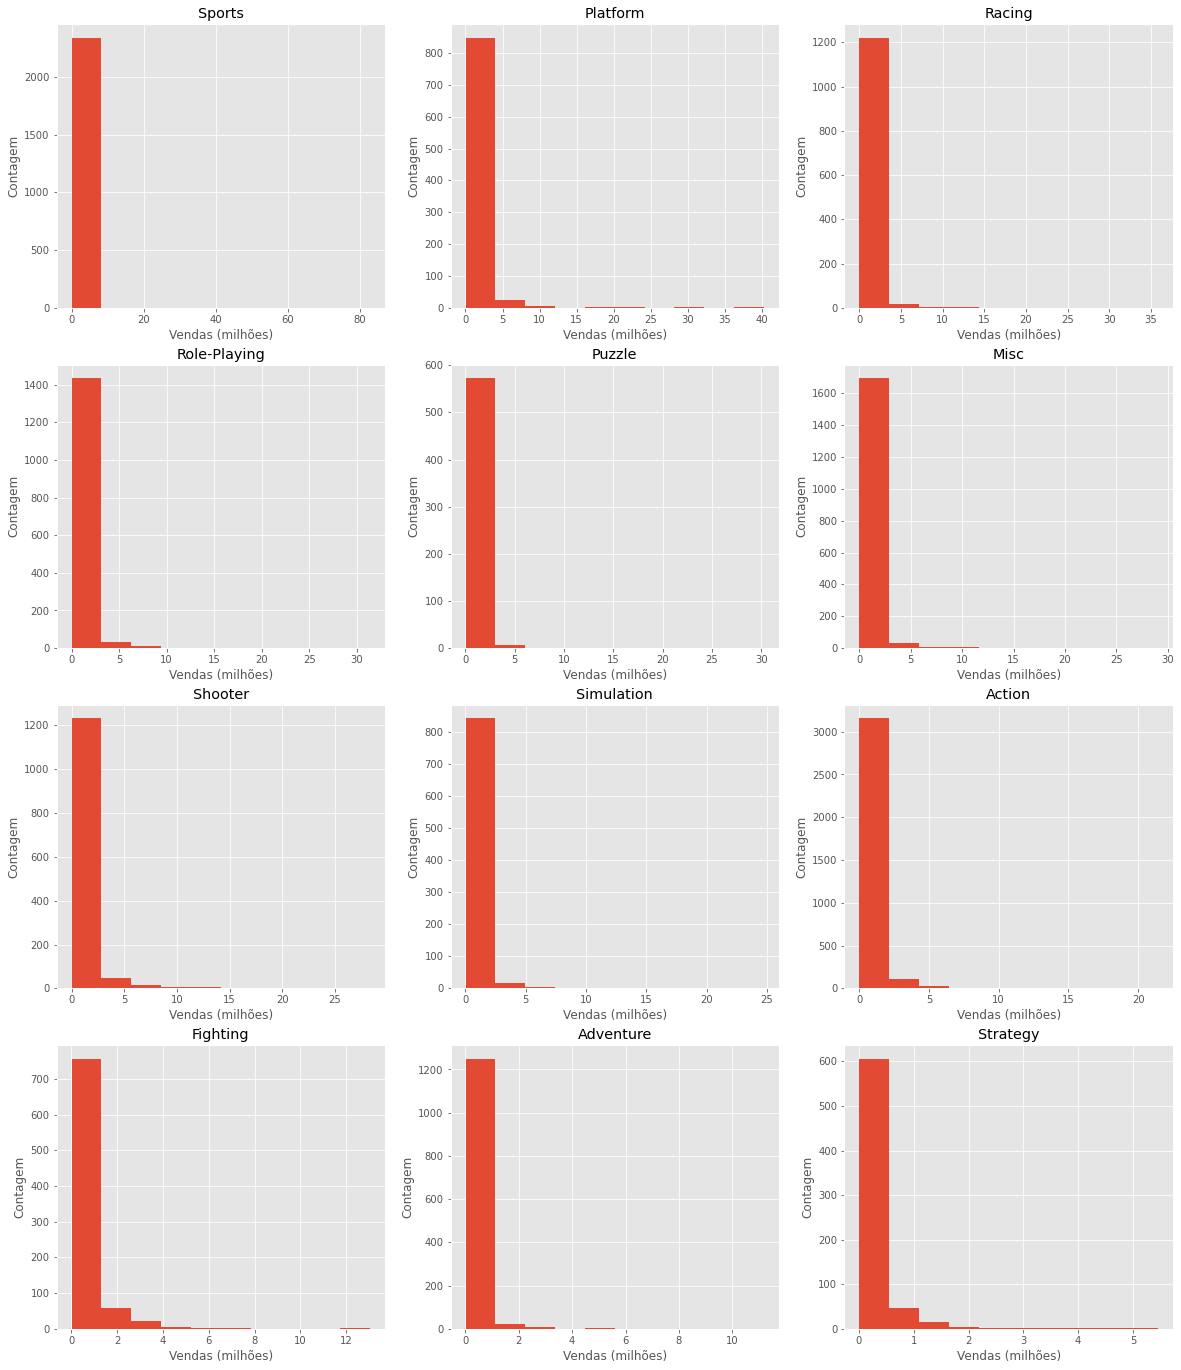

In [276]:
fig, axs = plt.subplots(4, 3, figsize=(20,24))
for i, ax in enumerate(np.ravel(axs)):
    arr = sales_per_genre[i]
    ax.hist(x = arr)
    ax.set_title(all_genres[i])
    ax.set_xlabel("Vendas (milhões)")
    ax.set_ylabel("Contagem")

### Teste de hipótese
Hipótese nula: todas as distribuições são iguais

In [277]:
n = len(sales_per_genre)
ans = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        ans[i,j] = stats.mannwhitneyu(sales_per_genre[i], sales_per_genre[j]).pvalue

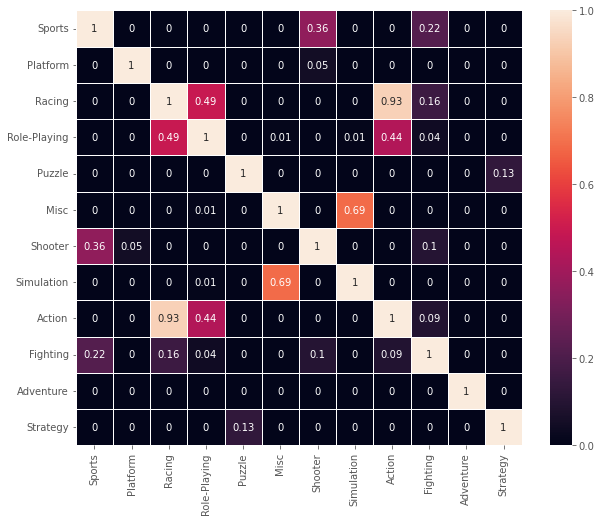

In [278]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
srn.heatmap(np.around(ans, 2), linewidth=1, annot=True)
plt.xticks(np.arange(0.5, n+0.5), all_genres, rotation=90)
plt.yticks(np.arange(0.5, n+0.5), all_genres, rotation=0)
plt.show()

# Distribuições de vendas por região

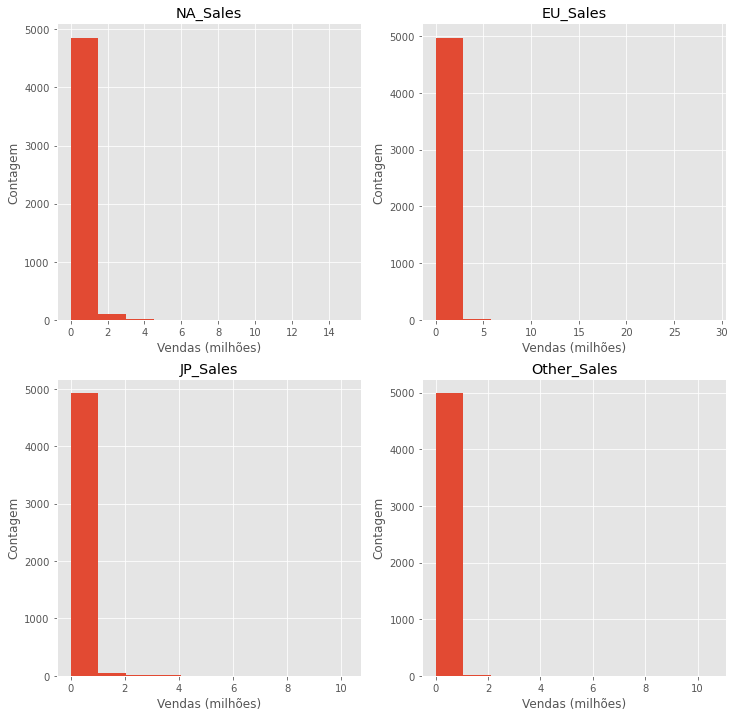

In [299]:
#sample de 5000????
region_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales_series = [df.loc[:,rs].sample(5000) for rs in region_sales]

fig, axs = plt.subplots(2, 2, figsize=(12,12))
for i, ax in enumerate(np.ravel(axs)):
    arr = region_sales_series[i]
    ax.hist(x = arr)
    ax.set_title(region_sales[i])
    ax.set_xlabel("Vendas (milhões)")
    ax.set_ylabel("Contagem")

In [300]:
# normalizado
# region_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# region_sales_series = [min_max_norm(df.loc[:,rs]) for rs in region_sales]

# fig, axs = plt.subplots(2, 2, figsize=(12,12))
# for i, ax in enumerate(np.ravel(axs)):
#     arr = region_sales_series[i]
#     ax.hist(x = arr)
#     ax.set_title(region_sales[i])
#     ax.set_xlabel("Vendas (milhões)")
#     ax.set_ylabel("Contagem")
#     ax.set_yscale('log')

### Teste de hipótese
Hipótese nula: todas as distribuições são iguais

In [301]:
n = len(region_sales)
ans = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        ans[i,j] = stats.mannwhitneyu(region_sales_series[i], region_sales_series[j]).pvalue

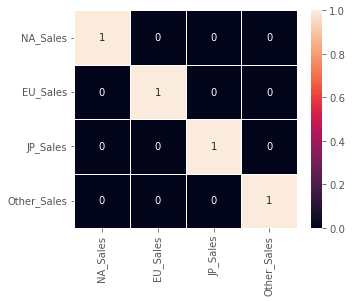

In [302]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
srn.heatmap(np.around(ans, 2), linewidth=1, annot=True)
plt.xticks(np.arange(0.5, n+0.5), region_sales, rotation=90)
plt.yticks(np.arange(0.5, n+0.5), region_sales, rotation=0)
plt.show()

# Distribuição de vendas por plataforma

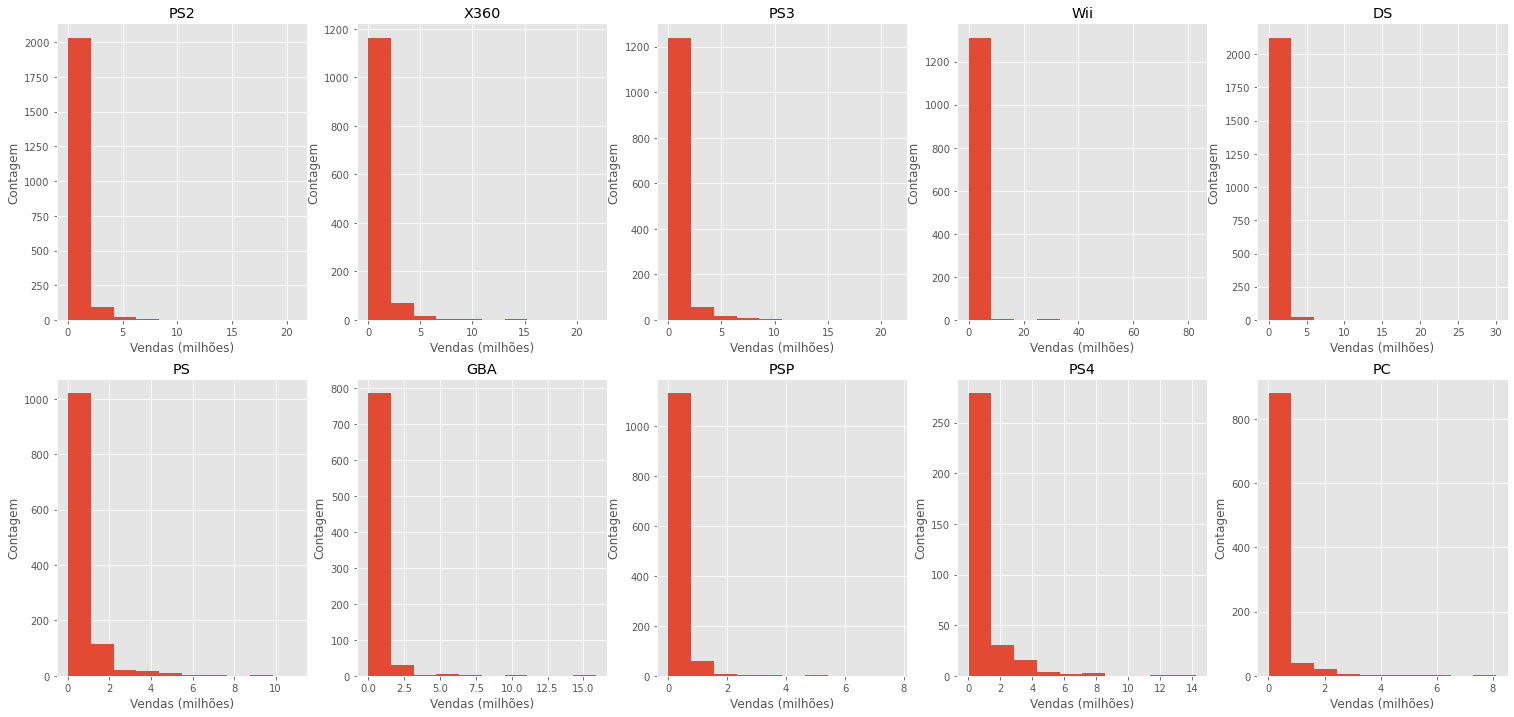

In [257]:
top10_plats = df.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False).index.to_list()[:10]
sales_per_platform = [df[df['Platform']==p]['Global_Sales'] for p in top10_plats]

fig, axs = plt.subplots(2, 5, figsize=(26,12))
for i, ax in enumerate(np.ravel(axs)):
    arr = sales_per_platform[i]
    ax.hist(x = arr)
    ax.set_title(top10_plats[i])
    ax.set_xlabel("Vendas (milhões)")
    ax.set_ylabel("Contagem")

### Teste de hipótese
Hipótese nula: todas as distribuições são iguais

In [304]:
n = len(sales_per_platform)
ans = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        ans[i,j] = stats.mannwhitneyu(sales_per_platform[i], sales_per_platform[j]).pvalue

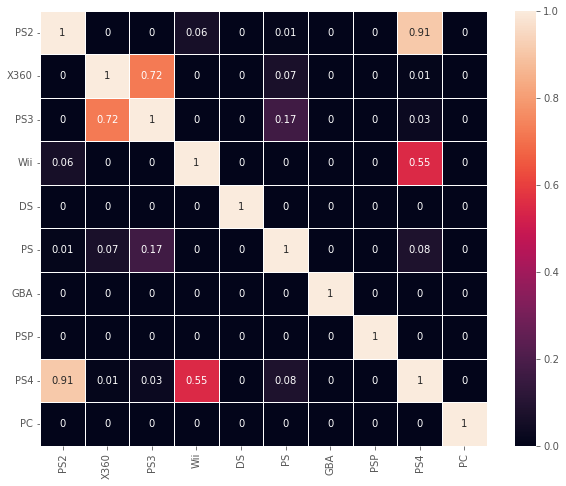

In [307]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
srn.heatmap(np.around(ans, 2), linewidth=1, annot=True)
plt.xticks(np.arange(0.5, n+0.5), top10_plats, rotation=90)
plt.yticks(np.arange(0.5, n+0.5), top10_plats, rotation=0)
plt.show()